In [1]:
import pandas as pd
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,2.0,84.0,0.0,21.0,0
1,9.0,112.0,28.2,50.0,1
2,1.0,139.0,28.7,22.0,0
3,0.0,161.0,21.9,65.0,0
4,6.0,134.0,46.2,46.0,1


In [2]:
total_data_clean = pd.concat([train_data, test_data], ignore_index=True)

# Mostrar información sobre el conjunto de datos combinado
print(total_data_clean.head())

# Guardar el conjunto de datos combinado si es necesario
total_data_clean.to_csv("../data/processed/total_data_clean.csv", index=False)


   Pregnancies  Glucose   BMI   Age  Outcome
0          2.0     84.0   0.0  21.0        0
1          9.0    112.0  28.2  50.0        1
2          1.0    139.0  28.7  22.0        0
3          0.0    161.0  21.9  65.0        0
4          6.0    134.0  46.2  46.0        1


VAMOS A VISUALIZARLO

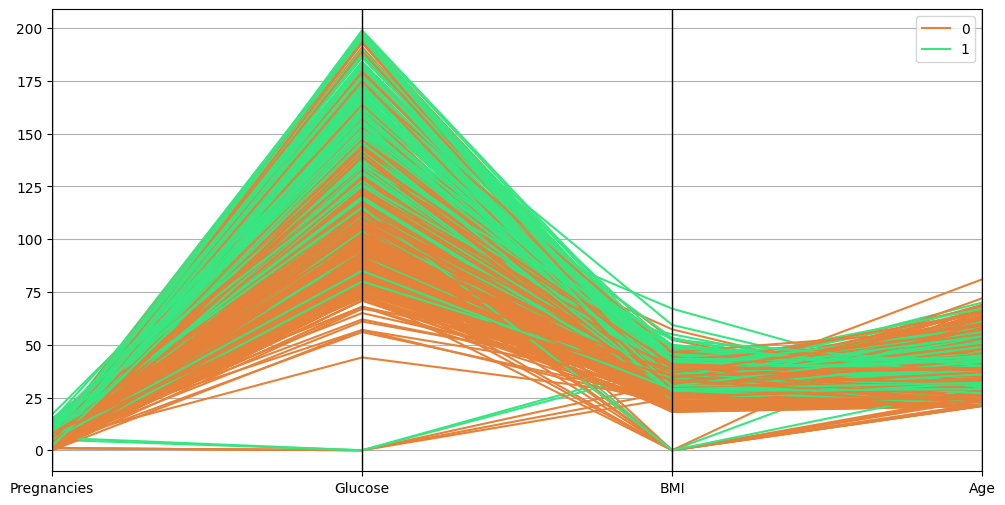

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data_clean, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [4]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [5]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 12)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

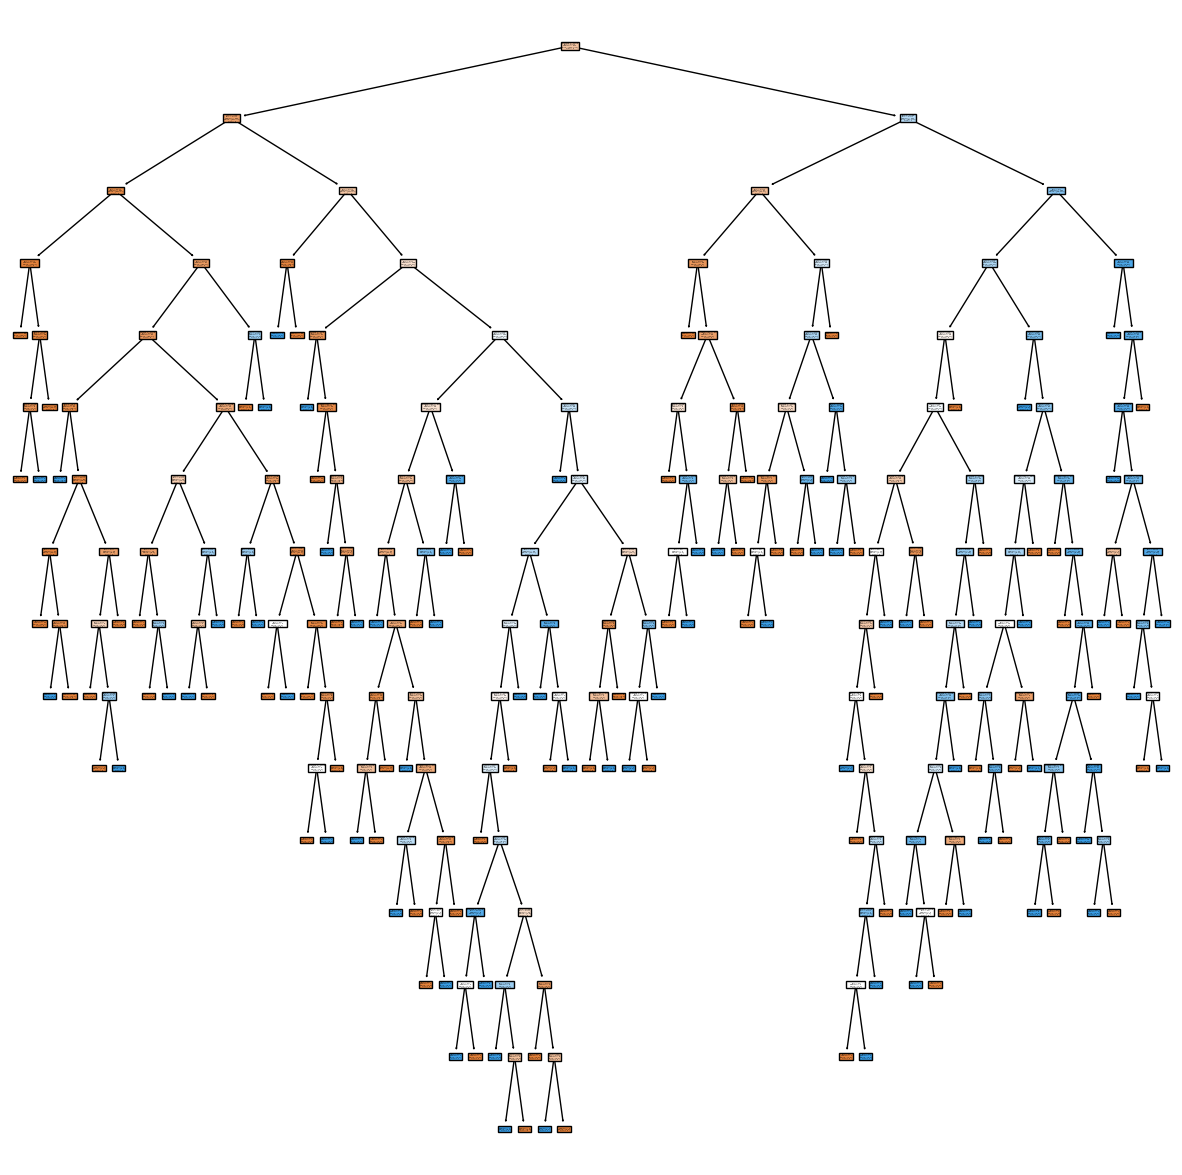

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [7]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6948051948051948

OBSERVAMOS QUE EL ACCURACY OBTENIDO NO ES MUY ALTO POR LO QUE VAMOS A OPTIMIZAR EL MODELO CON UN GRIDSEARCH

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features":[None]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 20)
grid

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20], 'max_features': [None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

VEMOS CUALES SON LOS MEJORES HYPERPARAMTEROS PARA METERLOS DESPUES EN NUESTRO MODELO Y OPTIMIZARLO

In [12]:

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [13]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 1, min_samples_split = 2, random_state = 12, max_features=None)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=12)

In [14]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7142857142857143

Observmoas que hemos podido mejor el modelo signifcativamente 